In [1]:
import pandas as pd 

In [2]:
# Get Data
train_data = pd.read_csv("./train.csv") 
test_data = pd.read_csv("./test.csv")

In [59]:
# Example data
train_data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [4]:
# Check number of examples
train_data.shape

(891, 12)

In [5]:
# Check missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [118]:
explore_data = train_data.iloc[:, 1:].copy()

In [119]:
import matplotlib.pyplot as plt
import matplotlib as mpl
params = {'axes.titlesize':'14',
          'xtick.labelsize':'10',
          'ytick.labelsize':'10',
          'figure.facecolor':'white'
         }
mpl.rcParams.update(params)

In [120]:
explore_data.loc[:, explore_data.columns != "PassengerId"].describe().round(3)

Survived   Pclass      Age    SibSp    Parch     Fare
count   891.000  891.000  714.000  891.000  891.000  891.000
mean      0.384    2.309   29.699    0.523    0.382   32.204
std       0.487    0.836   14.526    1.103    0.806   49.693
min       0.000    1.000    0.420    0.000    0.000    0.000
25%       0.000    2.000   20.125    0.000    0.000    7.910
50%       0.000    3.000   28.000    0.000    0.000   14.454
75%       1.000    3.000   38.000    1.000    0.000   31.000
max       1.000    3.000   80.000    8.000    6.000  512.329

In [121]:
explore_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [122]:
# Set up figure properties
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

[]

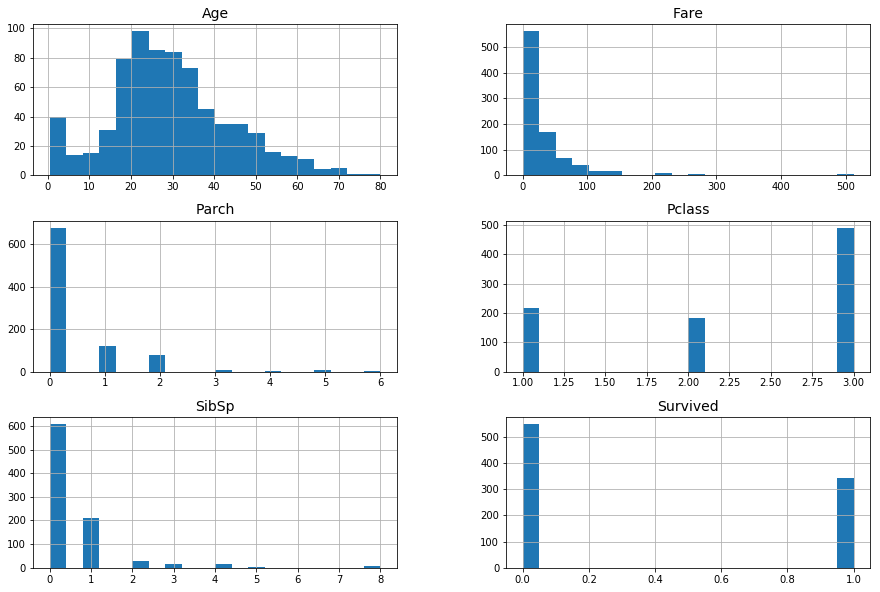

In [123]:
# Draw histograms for non survivors
explore_data.hist(bins=20, figsize=(15, 10), layout=(-1, 2))
plt.plot()

/home/long/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/long/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


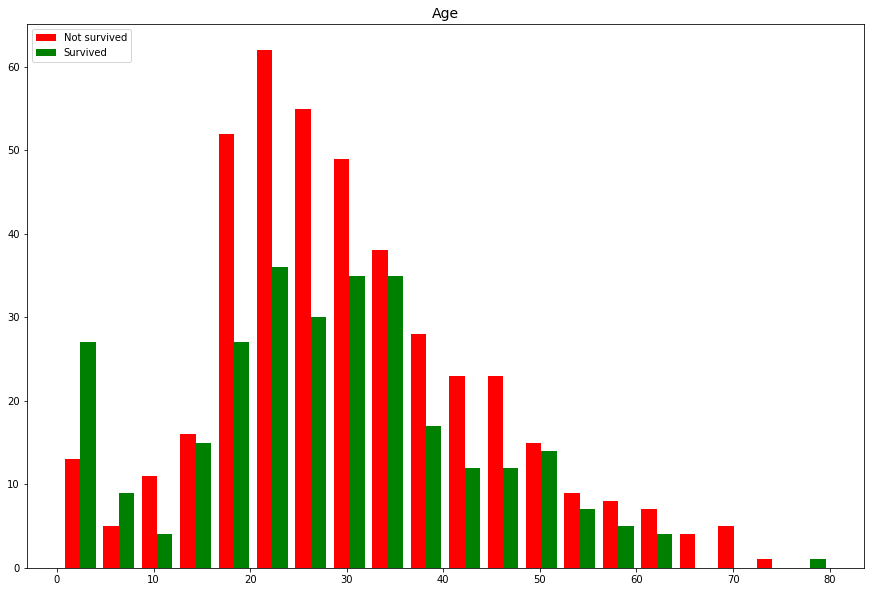

In [114]:
# Draw histograms for non survivors
not_survived = explore_data.loc[explore_data["Survived"]==0.0]
survived = explore_data.loc[explore_data["Survived"]==1.0]
for column in ["Age", "Parch", "SibSp", "Fare"]:
    plt.figure(figsize=(15, 10))
    not_survived_data = not_survived[column]
    survived_data = survived[column]
    plt.hist([not_survived_data, survived_data], bins=20, color=["r", "g"], label=["Not survived", "Survived"])
    plt.legend(loc="upper left")
    plt.title(column)
    plt.show()

In [154]:
# Draw histograms for non survivors
import seaborn as sns
for feature in ["Sex", "Pclass", "Embarked"]:
    feature_data = train_data.groupby(["Survived", feature])["PassengerId"].count().reset_index(name="Count")
    plt.figure(figsize=(15, 10))
    sns.barplot(x=feature, y="Count", hue="Survived", data=feature_data)
    plt.title(feature)
    plt.show()

In [14]:
explore_data[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [15]:
explore_data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [157]:
explore_data[["Survived", "Embarked"]].groupby(["Embarked"], as_index=False).mean().sort_values(by="Survived", ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


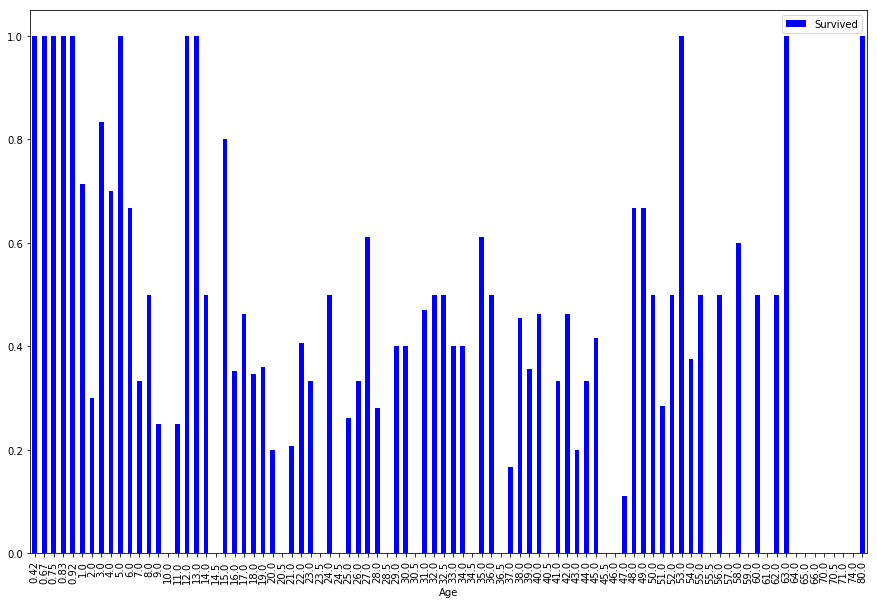

In [43]:
age_survive_df = explore_data[["Age", "Survived"]].groupby(["Age"], as_index=False).mean()
age_survive_df.sort_values(by="Age", ascending=True, inplace=True)
age_survive_df.plot.bar(x="Age", y="Survived", figsize=(15, 10), colors="blue")

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


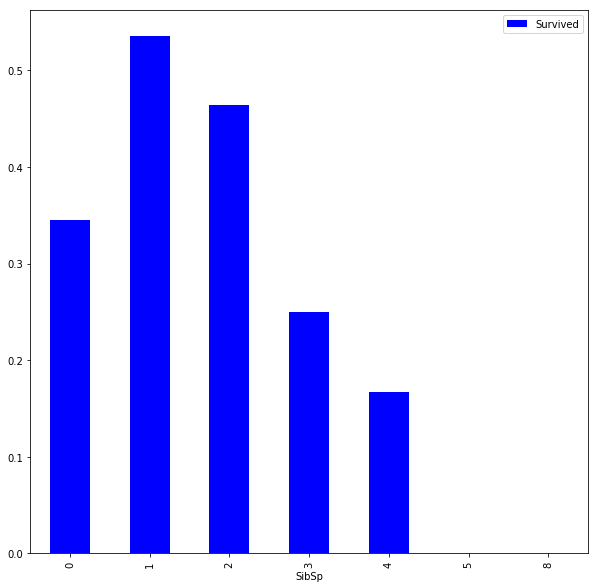

In [161]:
sibsp_survived_df = explore_data[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean()
sibsp_survived_df.sort_values(by="SibSp", ascending=True, inplace=True)
sibsp_survived_df.plot.bar(x="SibSp", y="Survived", figsize=(10, 10), colors="blue")

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


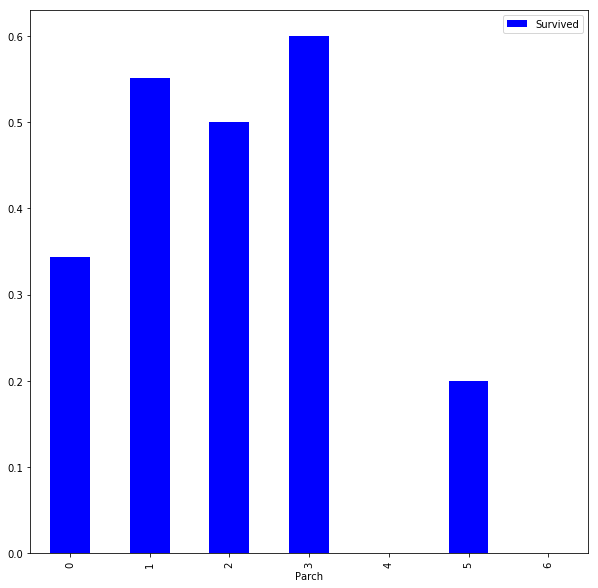

In [40]:
parch_survived_df = explore_data[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean()
parch_survived_df.sort_values(by="Parch", ascending=True, inplace=True)
parch_survived_df.plot.bar(x="Parch", y="Survived", figsize=(10, 10), colors="blue")

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


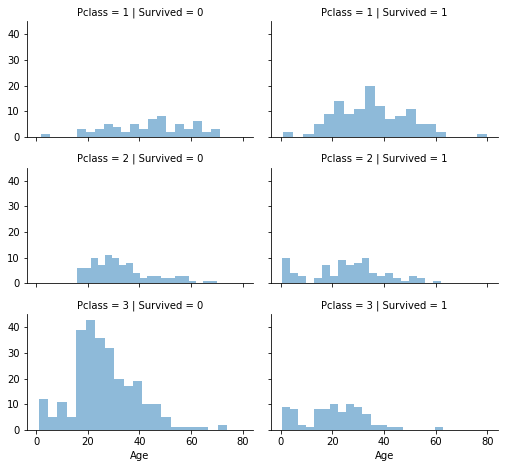

In [52]:
import seaborn as sns
grid = sns.FacetGrid(explore_data, col="Survived", row="Pclass", size=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


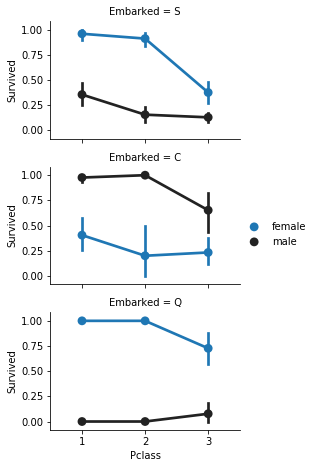

In [53]:
grid = sns.FacetGrid(explore_data, row="Embarked", size=2.2, aspect=1.6, palette = ["Blue", "Green"])
grid.map(sns.pointplot, "Pclass", "Survived", "Sex", pallete="deep")
grid.add_legend()

In [60]:
corr = explore_data.corr()
corr.style.background_gradient(cmap="binary", low=0, high=0.2).set_precision(2)

In [61]:
from pandas.plotting import scatter_matrix
color_map = {
    0: "#0392cf",
    1: "#ee4035"
}
colors = explore_data["Survived"].map(lambda x: color_map.get(x))
scatter_matrix(explore_data, figsize=(50, 50), alpha=0.8, color=colors)
plt.savefig("scatter_matrix.png")

In [ ]:
# TSNE Sta

In [54]:
# Separate labels from training data
y_train = train_data["Survived"]
X_train = train_data.drop("Survived", axis=1, inplace=False)

In [55]:
# Check label distribution
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [65]:
# Feature engineering
# sibsp and parch can be changed to single number 
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureEngineer(BaseEstimator, TransformerMixin):        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X["FamNum"] = X["SibSp"] + X["Parch"]
        return X

In [66]:
class FeatureDropper(BaseEstimator, TransformerMixin):        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.drop(["Ticket", "PassengerId", "Cabin"], inplace=False, axis=1)
        return X

In [67]:
# Attributes selector 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):    
        result = X[self.attribute_names].values
        return result

In [68]:
class DataFrameImputer(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        for attribute_name in self.attribute_names:
            freq_attr = X[attribute_name].dropna().mode()[0]
            X[attribute_name] = X[attribute_name].fillna(freq_attr)
        return X

In [69]:
import numpy as np
class LabelImputer(BaseEstimator, TransformerMixin):
    def __init__(self, nan_indices):
        self.nan_indices = nan_indices
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result_X = X.drop(self.nan_indices)
        return result_X

In [70]:
import numpy as np
class TitleExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, title_attr, name_attr):
        self.title_attr = title_attr
        self.name_attr =  name_attr
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X[self.title_attr] = X[self.name_attr].str.extract(' ([A-Za-z]+)\.', expand=False)
        return X

In [71]:
class CategorizeValues(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for attr in self.attrs:
            X[attr] = pd.qcut(X[attr], 4)
        return X

In [72]:
class CategoryDataChanger(BaseEstimator, TransformerMixin):        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):        
        class_dict = {1: "Upper", 2:"Middle", 3:"Lower"}
        X["Pclass"] = X["Pclass"].map(class_dict)  
        return X

In [73]:
X_train.head(10)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   
5            6       3                                   Moran, Mr. James   
6            7       1                            McCarthy, Mr. Timothy J   
7            8       3                     Palsson, Master. Gosta Leonard   
8            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
5    male   NaN      0      0            330877   8.4583   NaN        Q  
6    male  54.0      0      0             17463  51.8625   E46        S  
7    male   2.0      3      1            349909  21.0750   NaN        S  
8  female  27.0      0      2            347742  11.1333   NaN        S  
9  female  14.0      1      0            237736  30.0708   NaN        C

In [74]:
X_train.head(10)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   
5            6       3                                   Moran, Mr. James   
6            7       1                            McCarthy, Mr. Timothy J   
7            8       3                     Palsson, Master. Gosta Leonard   
8            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
5    male   NaN      0      0            330877   8.4583   NaN        Q  
6    male  54.0      0      0             17463  51.8625   E46        S  
7    male   2.0      3      1            349909  21.0750   NaN        S  
8  female  27.0      0      2            347742  11.1333   NaN        S  
9  female  14.0      1      0            237736  30.0708   NaN        C

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer, OneHotEncoder, CategoricalEncoder
num_attributes = ["FamNum", "SibSp", "Parch",]
cat_attributes = ["Pclass", "Sex", "Embarked", "Name", "Fare", "Age"]
# Transform numerical pipeline
num_pipeline = Pipeline([
    ("dropper", FeatureDropper()),
    ("feature_engineer", FeatureEngineer()),
    ("selector", DataFrameSelector(num_attributes)),
    ("imputer", Imputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Transform categorical pipeline
cat_pipeline = Pipeline([
    ("dropper", FeatureDropper()),
    ("title_extractor", TitleExtractor("Title", "Name")),
    ("cat_imputer", DataFrameImputer(cat_attributes)),
    ("cat_values", CategorizeValues(["Fare", "Age"])),
    ("selector", DataFrameSelector(cat_attributes)),
    ("cat_encoder", CategoricalEncoder())
])

ImportError: cannot import name 'CategoricalEncoder'

In [87]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

X_trans = full_pipeline.fit_transform(X_train.copy())

NameError: name 'num_pipeline' is not defined

In [ ]:
# Test first model: Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
log_reg_params = {
    "penalty":["l2"],
    "solver":["liblinear", "saga", "newton-cg", "lbfgs", "sag"],
    "max_iter":[100, 500, 2000],
    "random_state":[42],
    "C":np.logspace(-2, 0, num=10),
    "tol":np.logspace(-4, -2, num=5)
}

log_reg_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_params,
    cv=3, 
    n_jobs=2,
    n_iter=50,
    scoring="f1",
    verbose=3
)

log_reg_search.fit(X_trans, y_train.values)

In [ ]:
from sklearn.externals import joblib
joblib.dump(log_reg_search.best_estimator_, "./save_models/log_reg.pkl", compress=1)

In [ ]:
# Test second model: K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knearest_params = {
    "n_neighbors":[3, 5, 10, 20, 50],
    "weights":["uniform", "distance"],
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size":[5, 10, 30, 50],
    "p":[2],    
}
knearest_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=knearest_params,
    cv=3, 
    n_jobs=2,
    n_iter=50,
    scoring="f1",
    verbose=3
)
knearest_search.fit(X_trans, y_train)

In [ ]:
joblib.dump(knearest_search.best_estimator_, "./save_models/knearest.pkl", compress=1)

In [ ]:
# Test third model: Random Forest
from sklearn.ensemble import RandomForestClassifier
rand_forest_params = {
    "n_estimators":[10, 50, 100, 500, 2000],
    "max_features":["auto", "sqrt", "auto", "log2", None],
    "max_depth":[5, 10, 20, 50],
    "bootstrap":[True, False],
    "random_state":[42]
}
rand_forest_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rand_forest_params,
    cv=3, 
    n_jobs=2,
    n_iter=50,
    scoring="f1",
    verbose=3
)

rand_forest_search.fit(X_trans, y_train)

In [77]:
# Cross validation test
from sklearn.model_selection import cross_val_score
log_reg_scores = cross_val_score(
    log_reg_search.best_estimator_,
    X_trans,
    y_train,
    scoring="f1",
    cv=3
)
log_reg_scores

NameError: name 'log_reg_search' is not defined

In [78]:
knearest_scores = cross_val_score(
    knearest_search.best_estimator_,
    X_trans,
    y_train,
    scoring="f1",
    n_jobs=2,
    cv=3
)
knearest_scores

NameError: name 'knearest_search' is not defined

In [79]:
rand_forest_scores = cross_val_score(
    rand_forest_search.best_estimator_,
    X_trans,
    y_train,
    scoring="f1",
    n_jobs=2,
    cv=3
)
rand_forest_scores

NameError: name 'rand_forest_search' is not defined

In [80]:
test_data.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [81]:
# Performance on test set
X_test_trans = full_pipeline.transform(test_data)

NameError: name 'full_pipeline' is not defined

In [82]:
# log_reg_preds = log_reg_search.best_estimator_.predict(X_test_trans)
# knearest_preds = knearest_search.best_estimator_.predict(X_test_trans)
rand_forest_preds = rand_forest_search.best_estimator_.predict(X_test_trans)

NameError: name 'rand_forest_search' is not defined

In [83]:
print(test_data.shape)
print(rand_forest_preds.shape)

(418, 11)


NameError: name 'rand_forest_preds' is not defined

In [84]:
submit_data = pd.DataFrame(columns=["PassengerId", "Survived"])
submit_data["PassengerId"] = test_data["PassengerId"]
submit_data["Survived"] = rand_forest_preds.T

NameError: name 'rand_forest_preds' is not defined

In [85]:
submit_data.head(5)

PassengerId Survived
0          892      NaN
1          893      NaN
2          894      NaN
3          895      NaN
4          896      NaN

In [ ]:
submit_data.to_csv("rand_forest_submission.csv", index=False)